Name: Jaidev S K <br>
Roll No. 22110103 <br>
B.Tech CSE 2022

Note: The references for each solution are given at their respective places.

##Q1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.



Answer:

Let *A* be a matrix of size (n,k) and *B* be the matrix of size (k,m). If the product AB = C, then for every C<sub>ij</sub> as the j<sup>th</sup> element of the i<sup>th</sup> row, we can see that it is composed of the sum of all the k elements of the form A<sub>ip</sub>B<sub>pj</sub>, p ranging from 1 to k OR 0 to k-1(where the naming system is the same as used for C.) So, for every C<sub>ij</sub>, we have **k** multiplications and **k-1** additions as C<sub>ij</sub> is the sum of all those k products. But we have **n x m** such C<sub>ij</sub>'s. So, in total we will have **n x m x k** multiplications and **n x m x (k-1)** additions.

##Q2.Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [86]:
import time
start_time = time.time()

def matmul(m1, m2):
    result = []
    for i in range(len(m1)):
        row = []
        for j in range(len(m2[i])):
            sum = 0
            for k in range(len(m2)):
                sum += m1[i][k] * m2[k][j]
            row.append(sum)
        result.append(row)
    return result

m1 = [[1, 2], [3, 4]]
m2 = [[5, 6, 7], [8, 9, 10]]
result = matmul(m1, m2)
print(result)


print("The implementaion using List of Lists took ", (time.time() - start_time), "seconds")

[[21, 24, 27], [47, 54, 61]]
The implementaion using List of Lists took  0.00223541259765625 seconds


In [87]:
import numpy as np
import time
start_time = time.time()

result = np.matmul(m1, m2)
print(result)

print("The implementaion using Numpy took", (time.time() - start_time), "seconds")

[[21 24 27]
 [47 54 61]]
The implementaion using Numpy took 0.0008485317230224609 seconds


The reason Numpy took much less time may be because of the use of much more efficient data storge and more efficient implementation of the Matrix multiplication algo. It may also be because numpy is implemented in C++ which is much faster than python.

##Q3.Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

Since for finding the highest element, we will have to traverse the whole array, in this case since we are finding the median value, we are traversing N/2 times if there are N elements in the array. So, the time complexity is O(N<sup>2</sup>).<br>However, we can just sort the array and find the (N//2)<sup>th</sup> element in the array. Its is O(N logN) method.

In [90]:
import time
start_time = time.time()

def indexofmax(arr):
  max = arr[0]
  m = 0
  for i in range(len(arr)):
    if arr[i]>max:
      max = arr[i]
      m = i
  return m

def slowmedian(arr): # implementation of the suggested algo
  arr2 = arr.copy()
  n = len(arr)
  for i in range(n//2-1):
    arr2.pop(indexofmax(arr2))
  if n%2 == 1:
    arr2.pop(indexofmax(arr2))
    return max(arr2)
  else:
    a = max(arr2)
    arr2.pop(indexofmax(arr2))
    b = max(arr2)
    return (a+b)/2


arr = [5, 6, 7, 8, 9, 1, 2, 3, 4]
print(slowmedian(arr))

print("The implementaion took", (time.time() - start_time), "seconds")

5
The implementaion took 0.009248733520507812 seconds


In [91]:
def bettermethod1(arr): #implementation of better method
    sorted_arr = sorted(arr)
    mid = len(sorted_arr) // 2
    if len(arr) % 2 != 0:
      return sorted_arr[mid]
    else:
      return (sorted_arr[mid-1] + sorted_arr[mid]) / 2



import time
start_time = time.time()
print(bettermethod1(arr))
print("The implementaion took", (time.time() - start_time), "seconds")

5
The implementaion took 0.0002446174621582031 seconds


In [93]:
import time
start_time = time.time()
print(np.median(arr)) #np.median method
print("The implementaion took", (time.time() - start_time), "seconds")

5.0
The implementaion took 0.0008592605590820312 seconds


The times taken by the algorithms are as given above

##Q4.What is the gradient of the following function with respect to x and y?
#x<sup>2</sup>y + y<sup>3</sup>sinx


Answer:<br>
Gradient with respect to x is : ∂f/∂x = 2xy + y<sup>3</sup>cos(x)

Gradient with respect to y is : ∂f/∂y = x<sup>2</sup> + 3y<sup>2</sup>sin(x)



##Q5. Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

References: https://jax.readthedocs.io/en/latest/_autosummary/jax.grad.html
            

In [94]:
import jax
import jax.numpy

def f(x, y):
    return x**2 * y + y**3 * jax.numpy.sin(x)

grad_fx = jax.grad(f, argnums=(0))
grad_fy = jax.grad(f, argnums=(1))
x = 2.0
y = 3.0
gradient = [grad_fx(x, y), grad_fy(x,y)]
analytical_gradient_x = 2*x*y + y**3 * jax.numpy.cos(x)
analytical_gradient_y = x**2 + 3 * y**2 * jax.numpy.sin(x)

print("Gradient by JAX:", gradient)
print("Analytical gradient:", [analytical_gradient_x, analytical_gradient_y])


Gradient by JAX: [Array(0.7640352, dtype=float32, weak_type=True), Array(28.55103, dtype=float32, weak_type=True)]
Analytical gradient: [Array(0.7640352, dtype=float32, weak_type=True), Array(28.55103, dtype=float32, weak_type=True)]


In [95]:
x = 10.0
y = 13.0
gradient = [grad_fx(x, y), grad_fy(x,y)]
analytical_gradient_x = 2*x*y + y**3 * jax.numpy.cos(x)
analytical_gradient_y = x**2 + 3 * y**2 * jax.numpy.sin(x)

print("Gradient by JAX:", gradient)
print("Analytical gradient:", [analytical_gradient_x, analytical_gradient_y])

Gradient by JAX: [Array(-1583.4401, dtype=float32, weak_type=True), Array(-175.81873, dtype=float32, weak_type=True)]
Analytical gradient: [Array(-1583.4401, dtype=float32, weak_type=True), Array(-175.81873, dtype=float32, weak_type=True)]


##Q6. Use sympy to confirm that you obtain the same gradient analytically.

References: https://www.geeksforgeeks.org/python-sympy-diff-method/

In [ ]:
import sympy

x, y = sympy.symbols('x y')
f = x**2 * y + y**3 * sympy.sin(x)

df_dx = sympy.diff(f, x)
df_dy = sympy.diff(f, y)

print("Partial derivative with respect to x:", df_dx)
print("Partial derivative with respect to y:", df_dy)


Partial derivative with respect to x: 2*x*y + y**3*cos(x)
Partial derivative with respect to y: x**2 + 3*y**2*sin(x)


##Q7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:

<pre>
2022
Branch 1
Roll Number: 1, Name: N, Marks:
Maths: 100, English: 70 …
Branch 2
2023
Branch 1
Branch 2
2024
Branch 1
Branch 2
2025
Branch 1
Branch 2
</pre>

In [96]:
records_of_studets = {2022: {'Branch 1': {'Roll Number': 1,'Name': 'N','Marks': {'Maths': 100,'English': 70}}, 'Branch 2': {'Roll Number': 2,'Name': 'M','Marks': {'Maths': 0,'English': 20}}},
    2023:{'Branch 1': {'Roll Number': 11,'Name': 'N1','Marks': {'Maths': 10,'English': 80}}, 'Branch 2': {'Roll Number': 20,'Name': 'M2','Marks': {'Maths': 10,'English': 30}}},
    2024: {'Branch 1': {'Roll Number': 12,'Name': 'N2','Marks': {'Maths': 20,'English': 90}}, 'Branch 2': {'Roll Number': 21,'Name': 'M2','Marks': {'Maths': 20,'English': 40}}},
    2025: {'Branch 1': {'Roll Number': 13,'Name': 'N3','Marks': {'Maths': 30,'English': 100}}, 'Branch 2': {'Roll Number': 22,'Name': 'M3','Marks': {'Maths': 30,'English': 50}}}}


##Q8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [102]:
class Marks:
    def __init__(self, math, eng):
        self.mathmarks = math
        self.engmarks = eng

class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks

class Branch:
    def __init__(self):
        self.students = []

class Year:
    def __init__(self):
        self.branches = []

database = []

new_marks = Marks(100, 70)
new_student = Student(1, "N", new_marks)
new_branch = Branch()
new_branch.students.append(new_student)
new_year = Year()
new_year.branches.append(new_branch)
database.append(new_year)

new_marks1 = Marks(90, 80)
new_student1 = Student(2, "M", new_marks1)
new_branch.students.append(new_student1)

print("Student 1")
print("Name:",database[0].branches[0].students[0].name)
print("Roll No.:",database[0].branches[0].students[0].roll_number)
print("Maths Marks:",database[0].branches[0].students[0].marks.mathmarks)
print("English Marks:",database[0].branches[0].students[0].marks.engmarks)


print("\n\nStudent 2")
print("Name:",database[0].branches[0].students[1].name)
print("Roll No.:",database[0].branches[0].students[1].roll_number)
print("Maths Marks:",database[0].branches[0].students[1].marks.mathmarks)
print("English Marks:",database[0].branches[0].students[1].marks.engmarks)

Student 1
Name: N
Roll No.: 1
Maths Marks: 100
English Marks: 70


Student 2
Name: M
Roll No.: 2
Maths Marks: 90
English Marks: 80


##Q9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.



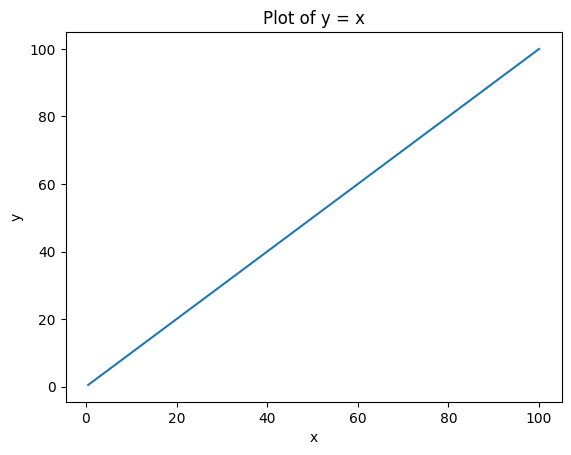

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(0.5, 100.5, 0.5)
y = x
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = x')
plt.show()


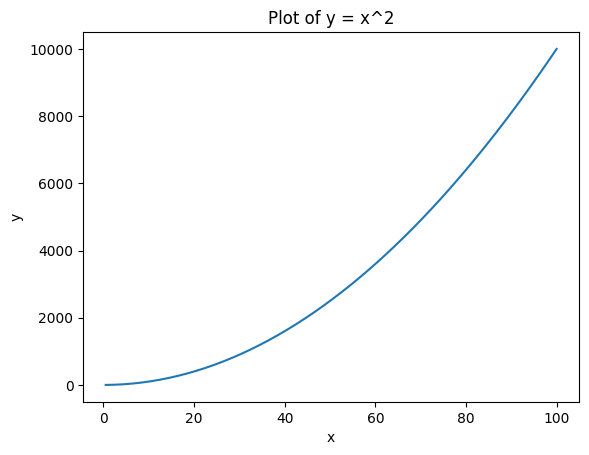

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(0.5, 100.5, 0.5)
y = x**2
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = x^2')
plt.show()


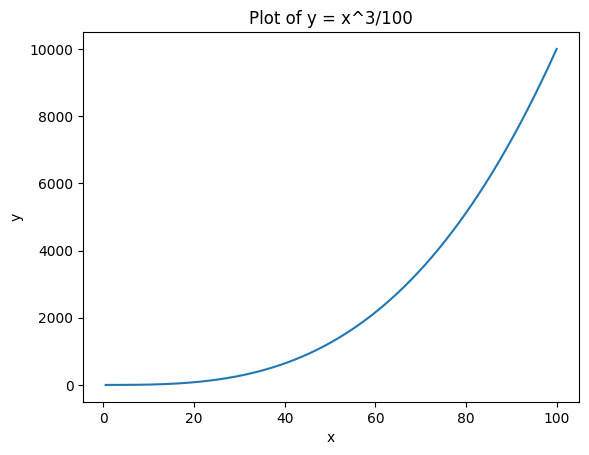

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(0.5, 100.5, 0.5)
y = x**3/100
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = x^3/100')
plt.show()


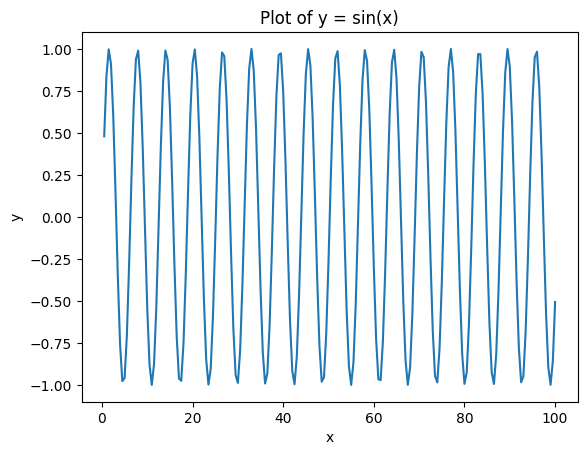

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(0.5, 100.5, 0.5)
y = np.sin(x)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = sin(x)')
plt.show()


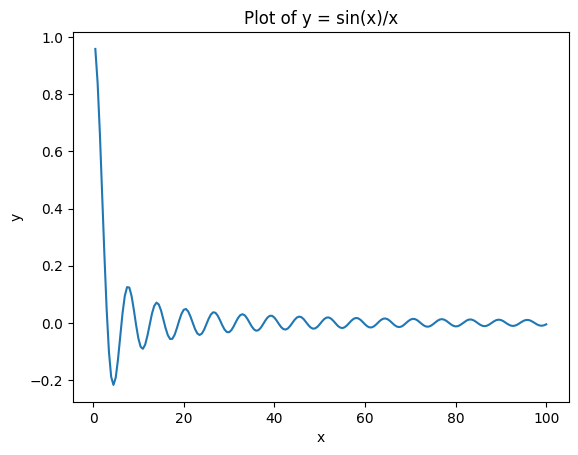

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(0.5, 100.5, 0.5)
y = np.sin(x)/x
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = sin(x)/x')
plt.show()


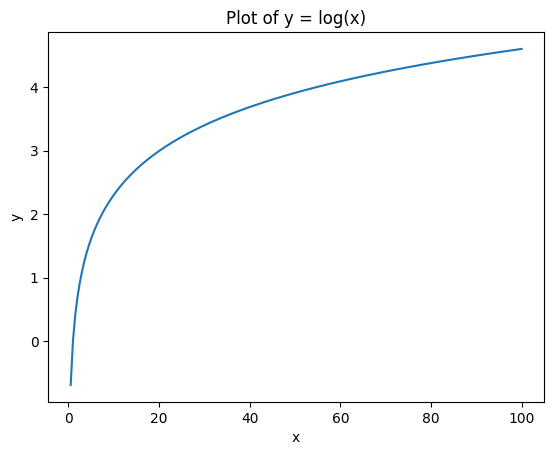

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(0.5, 100.5, 0.5)
y = np.log(x)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = log(x)')
plt.show()


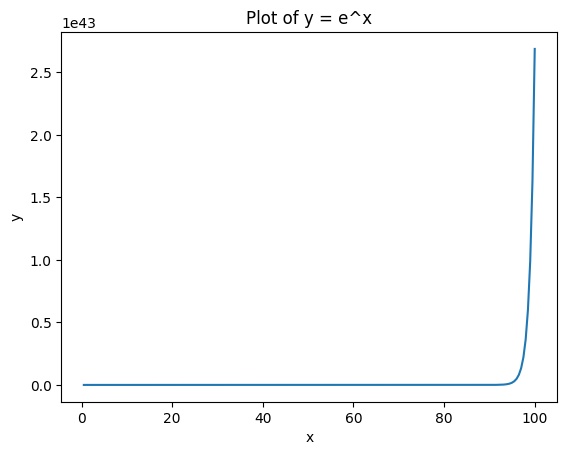

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(0.5, 100.5, 0.5)
y = np.exp(x)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = e^x')
plt.show()


##Q10. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.



References:

https://www.geeksforgeeks.org/python-pandas-dataframe-idxmax/

In [105]:
import numpy as np
import pandas as pd
mat = np.random.uniform(1, 2, size=(20, 5))
mat

array([[1.94987211, 1.16223433, 1.18422589, 1.7700276 , 1.45813355],
       [1.09533658, 1.03213486, 1.76755256, 1.31507042, 1.11140659],
       [1.67624105, 1.27514209, 1.50275777, 1.07805837, 1.13978065],
       [1.74758325, 1.76976989, 1.27283537, 1.88800242, 1.07435431],
       [1.50808463, 1.99183965, 1.47652774, 1.64626385, 1.85435599],
       [1.42052983, 1.68708988, 1.29225938, 1.87314964, 1.57693783],
       [1.98017587, 1.65568273, 1.76900951, 1.45013779, 1.66962239],
       [1.05591129, 1.46111431, 1.05331184, 1.5834174 , 1.64201599],
       [1.73855753, 1.22298705, 1.15723116, 1.98353837, 1.46174824],
       [1.83921591, 1.32615002, 1.79127403, 1.20209044, 1.02932063],
       [1.68426219, 1.25397517, 1.29632063, 1.51626693, 1.1378308 ],
       [1.75057857, 1.90340658, 1.44311315, 1.73298039, 1.93161827],
       [1.45269673, 1.5704963 , 1.19657632, 1.74047806, 1.50839902],
       [1.45361113, 1.89382732, 1.66650896, 1.66234092, 1.24965939],
       [1.40618522, 1.87725192, 1.

In [106]:
df = pd.DataFrame(mat, columns=["a", "b", "c", "d", "e"])
df

,a,b,c,d,e
0,1.949872,1.162234,1.184226,1.770028,1.458134
1,1.095337,1.032135,1.767553,1.315070,1.111407
2,1.676241,1.275142,1.502758,1.078058,1.139781
3,1.747583,1.769770,1.272835,1.888002,1.074354
4,1.508085,1.991840,1.476528,1.646264,1.854356
5,1.420530,1.687090,1.292259,1.873150,1.576938
6,1.980176,1.655683,1.769010,1.450138,1.669622
7,1.055911,1.461114,1.053312,1.583417,1.642016
8,1.738558,1.222987,1.157231,1.983538,1.461748
9,1.839216,1.326150,1.791274,1.202090,1.029321


In [107]:
higheststdcol = df.std().idxmax()
higheststdcol

'e'

In [108]:
lowestmeanrow = df.mean(axis=1).idxmin()
lowestmeanrow

1

##Q11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively

In [109]:
df["f"] = df[["a", "b", "c", "d", "e"]].sum(axis=1)
df


,a,b,c,d,e,f
0,1.949872,1.162234,1.184226,1.770028,1.458134,7.524493
1,1.095337,1.032135,1.767553,1.315070,1.111407,6.321501
2,1.676241,1.275142,1.502758,1.078058,1.139781,6.671980
3,1.747583,1.769770,1.272835,1.888002,1.074354,7.752545
4,1.508085,1.991840,1.476528,1.646264,1.854356,8.477072
5,1.420530,1.687090,1.292259,1.873150,1.576938,7.849967
6,1.980176,1.655683,1.769010,1.450138,1.669622,8.524628
7,1.055911,1.461114,1.053312,1.583417,1.642016,6.795771
8,1.738558,1.222987,1.157231,1.983538,1.461748,7.564062
9,1.839216,1.326150,1.791274,1.202090,1.029321,7.188051


In [111]:
def gt8func(x):
  if x < 8:
    return "LT8"
  else:
    return "GT8"

df["g"] = df["f"].apply(lambda x:gt8func(x))
df

,a,b,c,d,e,f,g
0,1.949872,1.162234,1.184226,1.770028,1.458134,7.524493,LT8
1,1.095337,1.032135,1.767553,1.315070,1.111407,6.321501,LT8
2,1.676241,1.275142,1.502758,1.078058,1.139781,6.671980,LT8
3,1.747583,1.769770,1.272835,1.888002,1.074354,7.752545,LT8
4,1.508085,1.991840,1.476528,1.646264,1.854356,8.477072,GT8
5,1.420530,1.687090,1.292259,1.873150,1.576938,7.849967,LT8
6,1.980176,1.655683,1.769010,1.450138,1.669622,8.524628,GT8
7,1.055911,1.461114,1.053312,1.583417,1.642016,6.795771,LT8
8,1.738558,1.222987,1.157231,1.983538,1.461748,7.564062,LT8
9,1.839216,1.326150,1.791274,1.202090,1.029321,7.188051,LT8


In [112]:
num_rows_lt8 = df["g"].value_counts()["LT8"]
num_rows_lt8

15

In [120]:
lt8lis = []
gt8lis = []
for i in range(len(df["g"])):
  if df["g"][i] == "LT8":
    lt8lis.append(df["f"][i])
  else:
    gt8lis.append(df["f"][i])

print("The LT8 Std Dev is", np.std(lt8lis))
print("The GT8 Std Dev is", np.std(gt8lis))

The LT8 Std Dev is 0.46108284532453064
The GT8 Std Dev is 0.24055506671231958


##Q12.Write a small piece of code to explain broadcasting in numpy.

The term broadcasting describes how NumPy treats arrays with different shapes during arithmetic operations. Subject to certain constraints, the smaller array is “broadcast” across the larger array so that they have compatible shapes.

Reference: https://numpy.org/doc/stable/user/basics.broadcasting.html

In simple words, during broadcasting, we can process arrays using different arithmetic operations and the shape of the arrays are broadcasted to match each other. The example is as given below:

In [80]:
import numpy as np
a = np.array([2])
b = np.array([1,2,3,4])
print(a*b)

[2 4 6 8]


In [81]:
import numpy as np
a = np.array([1,2])
b = np.array([1,2,3])
print(a*b)

ValueError: operands could not be broadcast together with shapes (2,) (3,) 

Here, the array a is broadcasted (effectively streched) to array b which has a greater size and broadcasted. However, we may also have some cases when such broadcasting may not be possible, when the sizes are incompatible.

##Q13.Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [123]:
import numpy as np

def argmin_wo_np(arr):
  min = arr[0]
  m = 0
  for i in range(len(arr)):
    if arr[i]<min:
      min = arr[i]
      m = i
  return m


arr = np.array([5, 2, 8, 7, 1, 19, 12, 6])
argmin_index = argmin_wo_np(arr)
print("My Answer:", argmin_index)

np_argmin_index = np.argmin(arr)

print("Numpy's Answer:", np_argmin_index)


My Answer: 4
Numpy's Answer: 4


## The End